#Pune Flood Sensor Data
In this notebook we will analyse Pune flood sensor data. 

### Load required modules and install pyIUDX module.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates
import folium
from folium import plugins

In [0]:
# install the latest version of pyIUDX module from github
pip install git+https://github.com/iudx/pyIUDX

  Cloning https://github.com/iudx/pyIUDX to /tmp/pip-req-build-tp9m94z9
  Running command git clone -q https://github.com/iudx/pyIUDX /tmp/pip-req-build-tp9m94z9
  Created wheel for pyIUDX: filename=pyIUDX-0.0.1-cp36-none-any.whl size=22325 sha256=96a131cd702ac91ac50a81442ef79a2adf4f81e32b1d2e31e24822953e14070f
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_3gct9n/wheels/9a/47/49/4628dcd08582cacb7599b922e10d77572044b4c49fe076e0e8
Successfully built pyIUDX


In [0]:
from pyIUDX.cat import cat
# Specify the catalogue server details.
# initialize a catalogue class
cat = cat.Catalogue("https://pudx.catalogue.iudx.org.in/catalogue/v1")

In [0]:
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 30000}}
attributes = {"tags": ["flood"]}
filters = ["id"]

all_flood_ItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)
print(all_flood_ItemsByID)
print("Number of items = ", len(all_flood_ItemsByID))

[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Hingne Khurd SR NO 18'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Katraj Mumbai Highway'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Prayega City'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Uttam Nagar(Indiranagar)'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Sangam Cross Road'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Wakad'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Opp. Dattanagar Baner Balawadi Cross'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Pashan Bopodi Nala'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/p

In [0]:
# Import the item class from pyIUDX.rs
from pyIUDX.rs import item
m = folium.Map(location=[18.5204,73.8567],zoom_start=12)
plugins.ScrollZoomToggler().add_to(m)
flood_sensors = item.Items("https://pudx.catalogue.iudx.org.in/catalogue/v1", all_flood_ItemsByID)
print(flood_sensors[0].geoProperties)
for sensor in flood_sensors:
  sensor_id = sensor.id  
  print("Sensor location = ", sensor.location.coordinates)
  folium.Marker([sensor.location.coordinates[1], sensor.location.coordinates[0] ], popup=sensor_id).add_to(m)    
m

['location']
Sensor location =  [73.815, 18.466743]
Sensor location =  [73.82616, 18.576302]
Sensor location =  [73.783856, 18.5625691]
Sensor location =  [73.831801, 18.478267]
Sensor location =  [73.7733941, 18.4585]
Sensor location =  [73.75912, 18.5871341]
Sensor location =  [73.8094, 18.474711]
Sensor location =  [73.7911981, 18.5362241]
Sensor location =  [73.82772, 18.488375]
Sensor location =  [73.8329631, 18.573808]
Sensor location =  [73.8364779, 18.5047619]
Sensor location =  [73.798638, 18.5471501]
Sensor location =  [73.8261239, 18.498396]
Sensor location =  [73.8115129, 18.56794]
Sensor location =  [73.8638231, 18.4920141]
Sensor location =  [73.802805, 18.483614]
Sensor location =  [73.855672, 18.5325731]
Sensor location =  [73.860397, 18.529627]
Sensor location =  [73.844455, 18.515439]
Sensor location =  [73.8739201, 18.558761]
Sensor location =  [73.863861, 18.5545509]
Sensor location =  [73.8430339, 18.5135281]
Sensor location =  [73.8766279, 18.576073]
Sensor locati

In [0]:
print(flood_sensors[0].quantitativeProperties)

['ALERT', 'CUR_LEVEL', 'DANGER', 'M_DISTANCE', 'REF_LEVEL']


In [0]:
flood_sensors.during("2019-06-01T00:00:00.000+05:30", "2019-11-02T00:00:00.000+05:30")

<Items [<pyIUDX.rs.item.Item object at 0x7fcf671014a8>, <pyIUDX.rs.item.Item object at 0x7fcf6710e160>, <pyIUDX.rs.item.Item object at 0x7fcf67105320>, <pyIUDX.rs.item.Item object at 0x7fcf6709a780>, <pyIUDX.rs.item.Item object at 0x7fcf67101358>, <pyIUDX.rs.item.Item object at 0x7fcf67105630>, <pyIUDX.rs.item.Item object at 0x7fcf67105be0>, <pyIUDX.rs.item.Item object at 0x7fcf6710ec50>, <pyIUDX.rs.item.Item object at 0x7fcf68a13438>, <pyIUDX.rs.item.Item object at 0x7fcf6a36d8d0>, <pyIUDX.rs.item.Item object at 0x7fcf670f25c0>, <pyIUDX.rs.item.Item object at 0x7fcf66883a58>, <pyIUDX.rs.item.Item object at 0x7fcf68a137f0>, <pyIUDX.rs.item.Item object at 0x7fcf670f2438>, <pyIUDX.rs.item.Item object at 0x7fcf6709ab00>, <pyIUDX.rs.item.Item object at 0x7fcf66f8aa90>, <pyIUDX.rs.item.Item object at 0x7fcf67105cc0>, <pyIUDX.rs.item.Item object at 0x7fcf65d8f828>, <pyIUDX.rs.item.Item object at 0x7fcf68a13550>, <pyIUDX.rs.item.Item object at 0x7fcf66f88080>, <pyIUDX.rs.item.Item object at 0

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


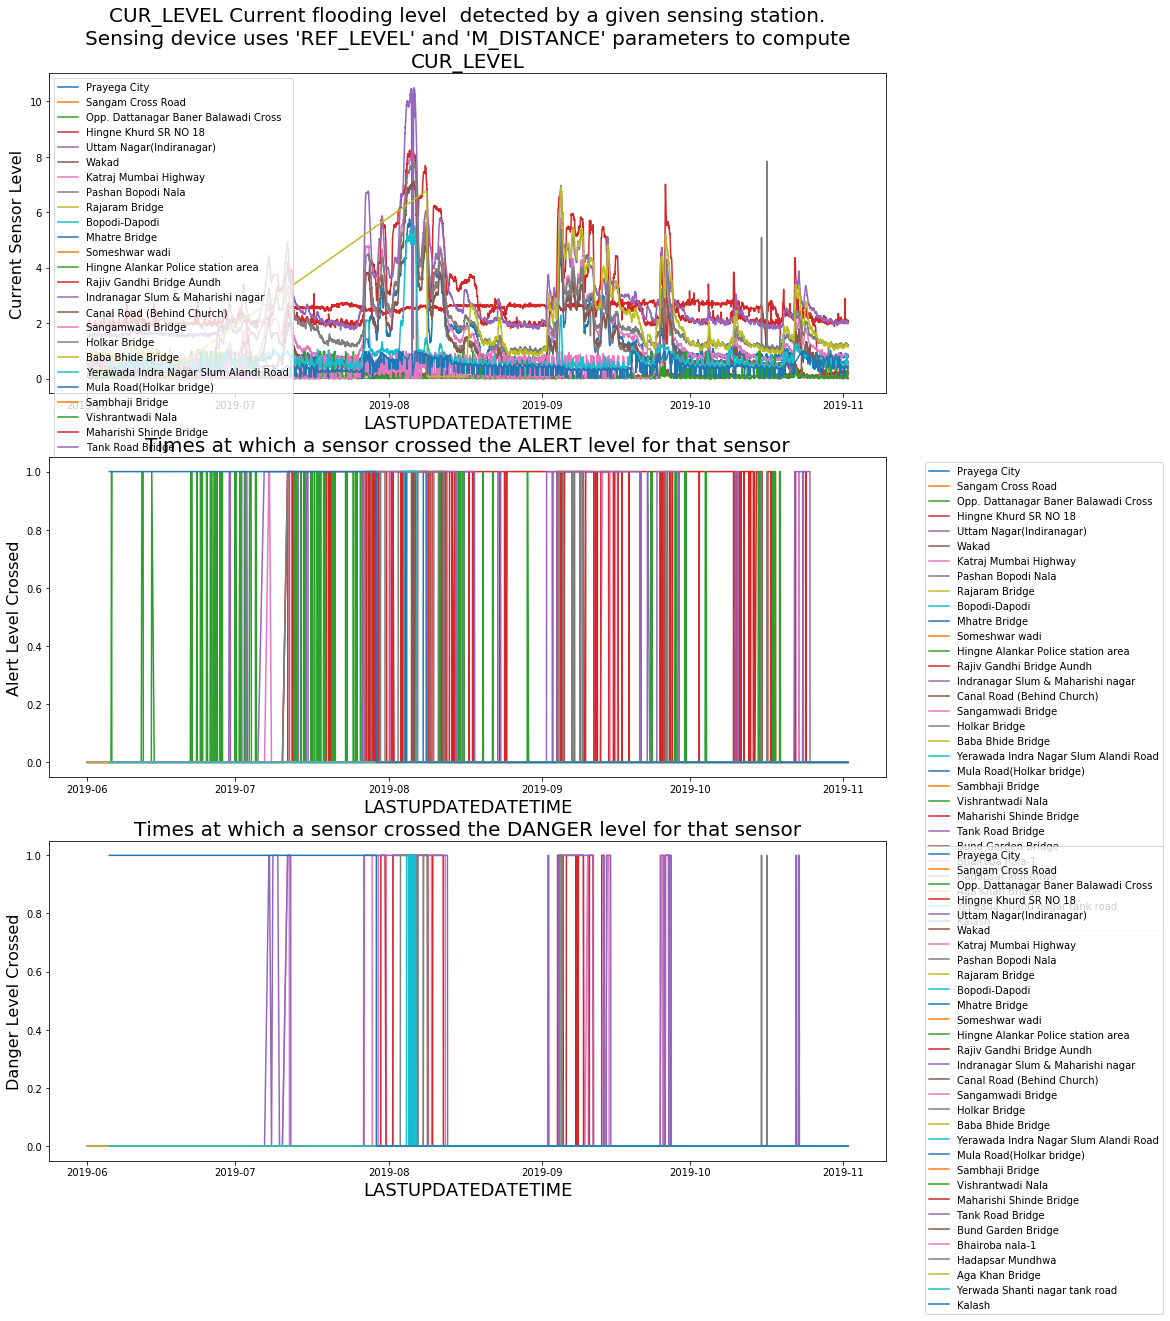

In [0]:
import matplotlib.pyplot as plt
from textwrap import wrap

fig, axis = plt.subplots(3,1,figsize=(15,20))
plt.subplot(3,1,1)
plt.title("\n".join(wrap(flood_sensors[1].CUR_LEVEL.name + "\n" + flood_sensors[1].CUR_LEVEL.describes)), fontsize=20)
for sensor in flood_sensors:
  plt.plot(sensor.CUR_LEVEL.value[:,0], sensor.CUR_LEVEL.value[:,1], label=sensor.id.split("/")[-1])
plt.legend()
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Current Sensor Level", fontsize=16)

plt.subplot(3,1,2)
plt.title("\n".join(wrap("Times at which a sensor crossed the ALERT level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_alert = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.ALERT.value[:,1])
  plt.plot(sensor.ALERT.value[:,0], crossed_alert, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Alert Level Crossed", fontsize=16)

plt.subplot(3,1,3)
plt.title("\n".join(wrap("Times at which a sensor crossed the DANGER level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_danger = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.DANGER.value[:,1])
  plt.plot(sensor.DANGER.value[:,0], crossed_danger, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Danger Level Crossed", fontsize=16)
plt.show()